### Importing TF

In [1]:
# import TF
import tensorflow as tf
print(tf.__version__)

2.7.0


### Loading data

In [4]:
# Load the data
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

#data

In [8]:
# check data type
type(data)

sklearn.utils.Bunch

In [12]:
# data shape
data.data.shape

(569, 30)

In [9]:
# data keys
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
# data targets
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [13]:
# target name
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [14]:
# data features
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### Split the data with Sklearn

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)
N, D = X_train.shape

In [17]:
N, D

(455, 30)

In [18]:
## Scale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### using TF: Build the model, Train, Evaluate, and Predict

In [19]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

### second method of building model
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid))

# Compile the model
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

# Evaluate the model = evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/100
15/15 [==============================] - 1s 16ms/step - loss: 0.7167 - accuracy: 0.5385 - val_loss: 0.7637 - val_accuracy: 0.5789
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6299 - accuracy: 0.6615 - val_loss: 0.6803 - val_accuracy: 0.6754
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5600 - accuracy: 0.7758 - val_loss: 0.6103 - val_accuracy: 0.7105
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5025 - accuracy: 0.8330 - val_loss: 0.5530 - val_accuracy: 0.7368
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4572 - accuracy: 0.8527 - val_loss: 0.5070 - val_accuracy: 0.7719
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4201 - accuracy: 0.8659 - val_loss: 0.4713 - val_accuracy: 0.7807
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3895 - accuracy: 0.8813 - val_loss: 0.4417 - val_accuracy: 0.8158
Epoch 8/100


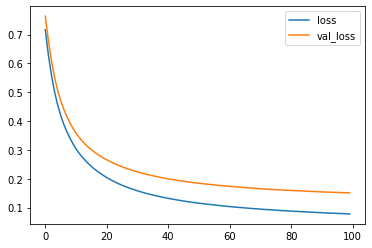

In [20]:
# Evaluate the model loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

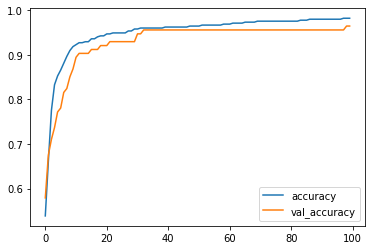

In [21]:
# plot the model accuracy
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

### Model Prediction

In [23]:
# Make prediction
pred = model.predict(X_test)
pred

array([[3.1206012e-04],
       [7.7832609e-01],
       [9.6925050e-01],
       [9.9833179e-01],
       [8.4073824e-01],
       [8.8817751e-01],
       [9.9945104e-01],
       [8.6462176e-01],
       [1.8132266e-01],
       [9.0064704e-03],
       [1.6412139e-04],
       [4.9593464e-01],
       [4.6622157e-03],
       [9.7350407e-01],
       [9.3659711e-01],
       [5.2966774e-03],
       [5.1777327e-01],
       [9.9933130e-01],
       [7.3319548e-05],
       [9.9489343e-01],
       [9.9070370e-01],
       [3.0881062e-01],
       [9.2823803e-03],
       [9.9768329e-01],
       [9.8954737e-03],
       [9.9470341e-01],
       [6.0016987e-06],
       [7.7965319e-02],
       [9.9709678e-01],
       [9.6850514e-01],
       [4.3144286e-02],
       [9.2330325e-01],
       [8.2234675e-01],
       [9.9923944e-01],
       [9.9956000e-01],
       [9.9772799e-01],
       [9.6579814e-01],
       [7.5982141e-01],
       [9.9861503e-01],
       [9.7195905e-01],
       [9.5457172e-01],
       [9.982703

In [24]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1)
import numpy as np
np.round(pred).flatten()

array([0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)